In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
%matplotlib inline 

In [2]:
df = pd.read_excel('final_data_cleaned.xlsx')
#This is the data generated in final_data_prep_gl.ipynb. It is also found in the GitLab repository.
df.columns

Index(['Unnamed: 0', 'id', 'egg_allergy_bl', 'pct_cd63_pos_aIge',
       'pnt_wheal_mm', 'pnt_IgE_log', 'pnt_IgG4_log', 'pnt_IgG4_IgE_ratio',
       'pnt_IgE', 'pnt_spec_IgG4', 'ethnicity', 'Sex', 'pnt_ara_h1',
       'pnt_ara_h2', 'pnt_ara_h3', 'pnt_ara_h8', 'pnt_ara_h9',
       'pnt_ara_h1_log', 'pnt_ara_h2_log', 'pnt_ara_h3_log', 'pnt_ara_h8_log',
       'pnt_ara_h9_log', 'cum_dose_tol', 'tot_ige', 'ofc', 'wt', 'bwt',
       'pnt_wheal_sqrt'],
      dtype='object')

In [3]:
#using only log-transformed versions of vars for logistic reg.
df = df.drop(columns= ['Unnamed: 0', 
             'id', 
             'pnt_wheal_mm', 
             'pnt_IgG4_IgE_ratio', 
             'pnt_IgE', 
             'pnt_spec_IgG4',
             'pnt_ara_h1', 
             'pnt_ara_h2', 
             'pnt_ara_h3', 
             'pnt_ara_h8', 
             'pnt_ara_h9',
             'cum_dose_tol'])

df = pd.get_dummies(df, columns = ['Sex', 'ethnicity', 'ofc'])
df = df.drop(columns=['ofc_Tolerant',#outcome is Allergic so that's all we want
                 'Sex_Female', #female will be reference group
                 'ethnicity_White' #this will be our reference group
                 ]) 

df.columns


Index(['egg_allergy_bl', 'pct_cd63_pos_aIge', 'pnt_IgE_log', 'pnt_IgG4_log',
       'pnt_ara_h1_log', 'pnt_ara_h2_log', 'pnt_ara_h3_log', 'pnt_ara_h8_log',
       'pnt_ara_h9_log', 'tot_ige', 'wt', 'bwt', 'pnt_wheal_sqrt', 'Sex_Male',
       'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Chinese, Middle Eastern, or Other Ethnic Group',
       'ethnicity_Mixed', 'ofc_Allergic'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split #I have newer version of python; older versions use cross_validation

feature_col_names = ['egg_allergy_bl', 'pct_cd63_pos_aIge', 'pnt_IgE_log', 'pnt_IgG4_log',
       'pnt_ara_h1_log', 'pnt_ara_h2_log', 'pnt_ara_h3_log', 'pnt_ara_h8_log',
       'pnt_ara_h9_log', 'tot_ige', 'wt', 'bwt', 'pnt_wheal_sqrt', 'Sex_Male',
       'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Chinese, Middle Eastern, or Other Ethnic Group',
       'ethnicity_Mixed']
predicted_class_names = ['ofc_Allergic']

x = df[feature_col_names].values #.values( ) returns a np representation of the df
y = df[predicted_class_names].values
split_test_size  = 0.30

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = split_test_size, random_state = 42)

Accuracy on training data: 93.64%
Accuracy on testing data: 98.67%
Confusion Matrix
[[62  1]
 [ 0 12]]
Classification report
              precision    recall  f1-score   support

       False       1.00      0.98      0.99        63
        True       0.92      1.00      0.96        12

    accuracy                           0.99        75
   macro avg       0.96      0.99      0.98        75
weighted avg       0.99      0.99      0.99        75



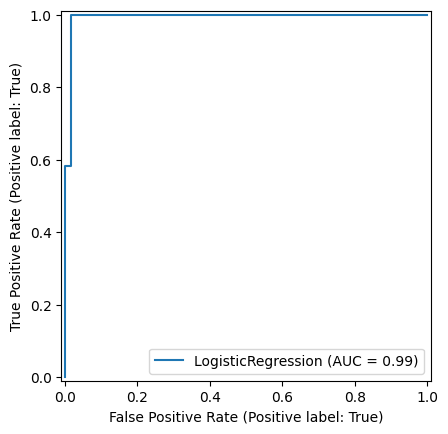

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_model = LogisticRegression(C = 0.7, random_state=42, solver='liblinear', class_weight='balanced') #C is regularization hyperparameter
    #added max_iter = 400 to eliminate error message about model not converging
lrm = lr_model.fit (x_train, y_train.ravel())

lr_predict_train = lr_model.predict(x_train)
lr_predict_test = lr_model.predict(x_test)

print (f"Accuracy on training data: {metrics.accuracy_score(y_train, lr_predict_train)*100:.2f}%")
print (f"Accuracy on testing data: {metrics.accuracy_score(y_test, lr_predict_test)*100:.2f}%")

print ("Confusion Matrix")
print (metrics.confusion_matrix (y_test, lr_predict_test))
    #input actual test values, then predicted values
    # TN FP
    # FN TP
    #Predicted values on X-axis, actual values on y-axis of confusion matrix

print ("Classification report")
print (metrics.classification_report(y_test, lr_predict_test))
    #precision = TP / TP + FP

#displaying ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lrm, x_test, y_test)
plt.show()

In [8]:
#returning variables and coefficients
indeps_list = df[feature_col_names].columns.tolist()



#the 0 is because for some reason list had 2 sets of brackets and i just want the list "inside"
coef_list = lr_model.coef_.tolist()[0]

dict = {'variable': indeps_list, 'coefficient': coef_list} 
coef_df = pd.DataFrame(dict)

coef_df








,variable,coefficient
0,egg_allergy_bl,0.566469
1,pct_cd63_pos_aIge,-0.014468
2,pnt_IgE_log,0.820095
3,pnt_IgG4_log,-0.780106
4,pnt_ara_h1_log,-0.351687
5,pnt_ara_h2_log,0.926104
6,pnt_ara_h3_log,-0.125955
7,pnt_ara_h8_log,-0.286971
8,pnt_ara_h9_log,-0.398968
9,tot_ige,0.000012


In [14]:
#attempting decision tree with non log-transformed vars

#df2 will contain the original variables, not their log transformed versions, for comparison
df2 = pd.read_excel('final_data_cleaned.xlsx')
df2 = df2.drop (columns = ['Unnamed: 0',
                            'id',
                            'pnt_IgE_log',
                            'pnt_IgG4_log',
                            'pnt_ara_h1_log',
                            'pnt_ara_h2_log',
                            'pnt_ara_h3_log',
                            'pnt_ara_h8_log',
                            'pnt_ara_h9_log',
                            'cum_dose_tol'])
df2 = pd.get_dummies(df2, columns = ['Sex', 'ethnicity', 'ofc'])
df2 = df2.drop(columns=['ofc_Tolerant',#outcome is Allergic so that's all we want
                 'Sex_Female', #female will be reference group
                 'ethnicity_White' #this will be our reference group
                 ]) 

df2.columns

Index(['egg_allergy_bl', 'pct_cd63_pos_aIge', 'pnt_wheal_mm',
       'pnt_IgG4_IgE_ratio', 'pnt_IgE', 'pnt_spec_IgG4', 'pnt_ara_h1',
       'pnt_ara_h2', 'pnt_ara_h3', 'pnt_ara_h8', 'pnt_ara_h9', 'tot_ige', 'wt',
       'bwt', 'pnt_wheal_sqrt', 'Sex_Male', 'ethnicity_Asian',
       'ethnicity_Black',
       'ethnicity_Chinese, Middle Eastern, or Other Ethnic Group',
       'ethnicity_Mixed', 'ofc_Allergic'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split #I have newer version of python; older versions use cross_validation

feature_col_names = ['egg_allergy_bl', 'pct_cd63_pos_aIge', 'pnt_wheal_mm',
       'pnt_IgG4_IgE_ratio', 'pnt_IgE', 'pnt_spec_IgG4', 'pnt_ara_h1',
       'pnt_ara_h2', 'pnt_ara_h3', 'pnt_ara_h8', 'pnt_ara_h9', 'tot_ige', 'wt',
       'bwt', 'pnt_wheal_sqrt', 'Sex_Male', 'ethnicity_Asian',
       'ethnicity_Black',
       'ethnicity_Chinese, Middle Eastern, or Other Ethnic Group',
       'ethnicity_Mixed']
predicted_class_names = ['ofc_Allergic']

x = df2[feature_col_names].values #.values( ) returns a np representation of the df
y = df2[predicted_class_names].values
split_test_size  = 0.30

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = split_test_size, random_state = 42)

Accuracy on training data: 94.80%
Accuracy on testing data: 90.67%
Confusion Matrix
[[58  5]
 [ 2 10]]
Classification report
              precision    recall  f1-score   support

       False       0.97      0.92      0.94        63
        True       0.67      0.83      0.74        12

    accuracy                           0.91        75
   macro avg       0.82      0.88      0.84        75
weighted avg       0.92      0.91      0.91        75



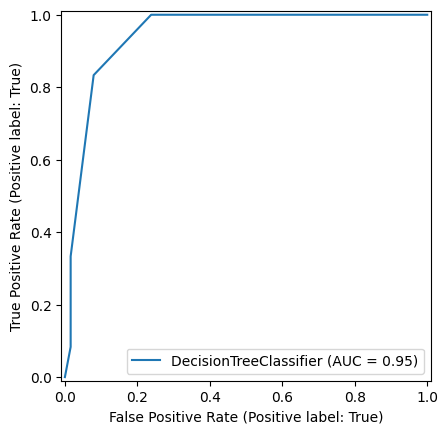

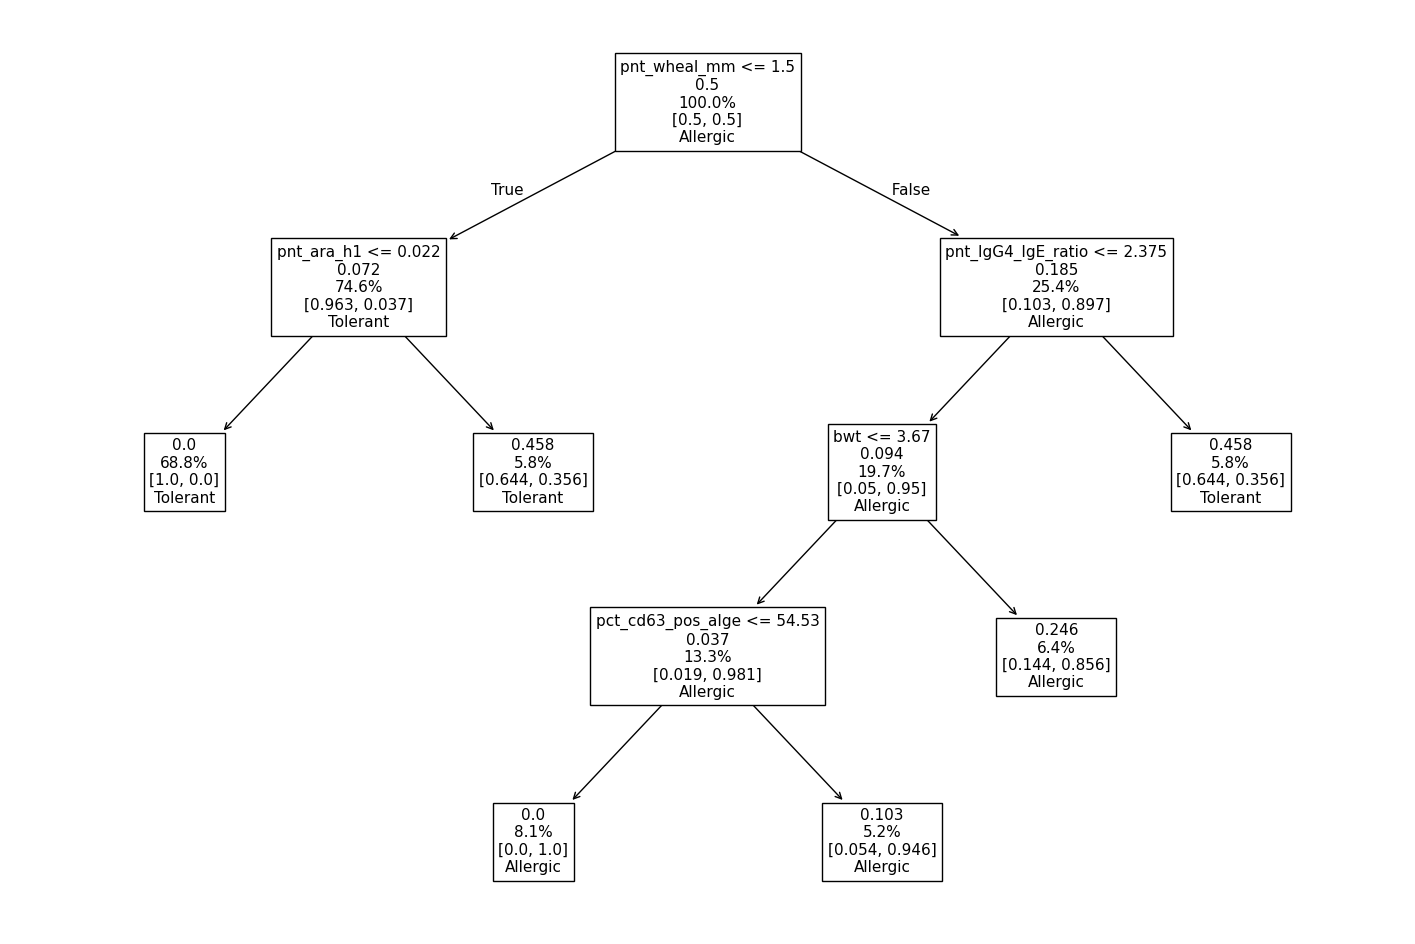

In [55]:
from sklearn import tree
from sklearn import metrics

tree_model = tree.DecisionTreeClassifier(class_weight = 'balanced', min_samples_leaf=6) #oversampling allergic group
trm = tree_model.fit (x_train, y_train.ravel())

tree_predict_train = tree_model.predict(x_train)
tree_predict_test = tree_model.predict(x_test)

print (f"Accuracy on training data: {metrics.accuracy_score(y_train, tree_predict_train)*100:.2f}%")
print (f"Accuracy on testing data: {metrics.accuracy_score(y_test, tree_predict_test)*100:.2f}%")

print ("Confusion Matrix")
print (metrics.confusion_matrix (y_test, tree_predict_test))
    #input actual test values, then predicted values
    # TN FP
    # FN TP
    #Predicted values on X-axis, actual values on y-axis of confusion matrix

print ("Classification report")
print (metrics.classification_report(y_test, tree_predict_test))

#displaying ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(trm, x_test, y_test)
plt.show()

plt.figure(figsize=(18,12))
names = ['Tolerant', 'Allergic']
indeps_list = df2[feature_col_names].columns.tolist()
tree.plot_tree(trm, feature_names = indeps_list, proportion = True, label='none', fontsize=11, class_names = names)
plt.show()